Python 3.8

Project Instructions

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

What is the most commonly awarded gender and birth country?

    Store your answers as string variables top_gender and top_country.

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

    Store this as an integer called max_decade_usa.

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

    Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

Who was the first woman to receive a Nobel Prize, and in what category?

    Save your string answers as first_woman_name and first_woman_category.

Which individuals or organizations have won more than one Nobel Prize throughout the years?

    Store the full names in a list named repeat_list.

How to approach the project

1. Load the dataset and find the most common gender and birth country

Load the dataset into a DataFrame using pandas and then extract the top values from sex and birth_country.
Load in data

    Use the pandas read_csv() function to load the data as a DataFrame.

Most common value in a column

    Use value_counts() on the desired column and tag .index[0] to the end to grab only the top value.

2. Identify the decade with the highest ratio of US-born winners

To calculate the ratio, first create a column that creates a flag for winners whose birth country is "United States of America", then create a decade column, and use both to find the ratio.
Create the US-born winners column

    Use the following syntax to create a new column based on information in an existing column: df['col_name'] = df['col_name'] == 'France'

Create the decade column

    Each year value in the decade column should end with 0. Divide the year values by 10 and wrap this in np.floor().
    You'll then need to multiply by 10 to get the four-digit year value and set the type as int using .astype().

Finding the ratio

    Use groupby() to group by decade, then use .mean() on the US-born winner column. By setting as_index=False, you make sure the result is saved as a DataFrame rather than a series.

Identify the decade with the highest ratio of US-born winners

    Using the DataFrame with the US-born winner ratio, find the row that has the highest ratio by filtering the DataFrame to find the row with the .max() ratio value.
    To save only the decade value, add ['decade'] and .values[0] to the filter and save this to max_decade_usa.

Create a relational line plot

    This step is optional. Use the relplot() function from seaborn, with the kind parameter equal to "line"; fill in the appropriate x, y, and data parameters.

3. Find the decade and category with the highest proportion of female laureates

You can copy and modify your code from the previous tasks to create a DataFrame for the proportion of female winners, then create a dictionary called max_female_dict with the year and category pair with the most female winners.
Filtering for female winners

    Add a column where the value is True when sex is "Female".

Group by two columns

    Use groupby() to group by both decade and category, then isolate the female_winner column and take the mean(). Use as_index=False to save the result as a DataFrame.

Find the decade and category with the highest female winners

    Using the new DataFrame with the means of female winners, find the row that has the highest mean by filtering the DataFrame to find the row with the .max() mean value.
    To save the decade and category values, add ['decade', 'category'] to the filter.

Create a dictionary

    Use the curly braces syntax to create a dictionary and apply .values[0] to extract the decade and category from the values you just saved. It should look something like this: {df['col1'].values[0]: df['col2'].values[0]}

Create a relational line plot with multiple categories

    This step is optional: Use the same plotting code as the previous task and add the hue parameter, mapping it to the category variable.

4. Find first woman to win a Nobel Prize

Filter the DataFrame for the rows with Female winners and find the earliest year and corresponding category in this subset.
Filter a DataFrame

    Use the female winner column you created and filter the DataFrame with the following syntax: new_df = df[df['col']]

Find the minimum value in a column

    To find the lowest value in a particular column, you can use: min_row = df[df['col'] == df['col_'].min()].

5. Determine repeat winners

Count the number of times each winner has won, then select those with counts of two or more, saving the full names as a list called repeats.
Count the values in a column

    Apply .value_counts() on the full_name column to get the counts for each winner as a pandas Series.

Finding counts of two or more

    Subset the counts to keep only those with >= 2 counts and use .index to keep only the names: counts[counts >= 2].index.

Save as a list

    You can convert an object to a list with list(object).

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

Find the most common gender
Male


Find the most common birth country
United States of America


Identify the decade with the highest ratio of US-born winners
2000




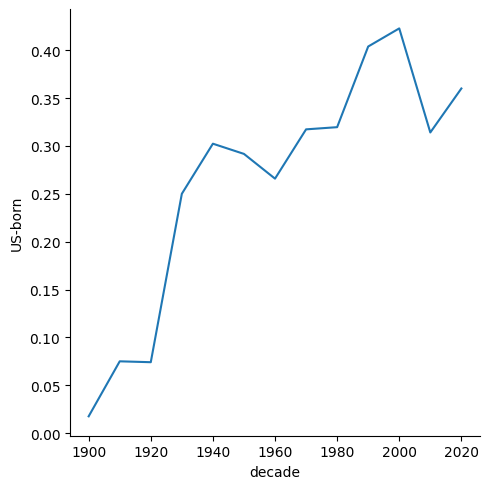

Find the decade and category with the highest proportion of female laureates
{np.int64(2020): 'Literature'}
Decade: 2020
Decade: Literature




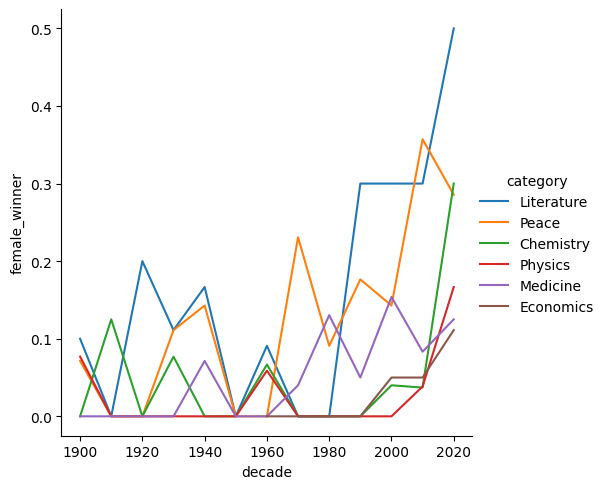

Find the first woman to win a Nobel Prize
Marie Curie, née Sklodowska


Find the first woman to win a Nobel Prize and the corresponding category
Physics


Determine repeat winners
Comité international de la Croix Rouge (International Committee of the Red Cross)
Frederick Sanger
Marie Curie, née Sklodowska
Office of the United Nations High Commissioner for Refugees (UNHCR)
John Bardeen
Linus Carl Pauling




In [10]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
# Load the dataset into a DataFrame using pandas and then extract the top values from sex and birth_country.
# Load in data
nobel_prize_API_dataset = pd.read_csv("data/nobel.csv")

# Extract the top values from the 'sex' column
# Most common value in a column
top_sex_values = nobel_prize_API_dataset['sex'].value_counts()
top_gender = top_sex_values.index[0]
print("Find the most common gender")
print(top_gender)
print("\n")

# Extract the top values from the 'birth_country' column
# Most common value in a column
top_birth_country_values = nobel_prize_API_dataset['birth_country'].value_counts()
top_country = top_birth_country_values.index[0]
print("Find the most common birth country")
print(top_country)
print("\n")

# Identify the decade with the highest ratio of US-born winners
# Create the US-born winners column
nobel_prize_API_dataset['US-born'] = nobel_prize_API_dataset['birth_country'] == 'United States of America'

# Create the decade column
nobel_prize_API_dataset['decade'] = np.floor((nobel_prize_API_dataset['year'] // 10) * 10).astype(int)

# View results of decade column
# print(nobel_prize_API_dataset['decade'])

# Finding the ratio
# By setting as_index=False, you make sure the result is saved as a DataFrame rather than a series.
ratio = nobel_prize_API_dataset.groupby('decade', as_index=False)['US-born'].mean().sort_values(by='US-born', ascending=False)

# Identify the decade with the highest ratio of US-born winners
max_decade_usa = ratio['decade'].values[0]
print("Identify the decade with the highest ratio of US-born winners")
print(max_decade_usa)
print("\n")

# View results of max_decade_usa
# print(max_decade_usa.astype(int))

# Create a relational line plot
sns.relplot(
    x="decade",
    y="US-born",
    kind="line",
    data=ratio
)
plt.show()

# Find the decade and category with the highest proportion of female laureates
# Filtering for female winners
nobel_prize_API_dataset['female_winner'] = nobel_prize_API_dataset['sex'] == 'Female'

# Group by two columns
group = nobel_prize_API_dataset.groupby(['decade', 'category'], as_index=False)['female_winner'].mean().sort_values(by='female_winner', ascending=False)

# Create a dictionary
max_female_dict = {group['decade'].values[0]: group['category'].values[0]}
print("Find the decade and category with the highest proportion of female laureates")
print(max_female_dict)
print("Decade: " + str(list(max_female_dict.keys())[0]))
print("Decade: " + str(list(max_female_dict.values())[0]))
print("\n")

# Create a relational line plot with multiple categories
sns.relplot(
    x="decade",
    y="female_winner",
    kind="line",
    data=group,
    hue="category"
)
plt.show()

# Find first woman to win a Nobel Prize
# Filter a DataFrame
new_df = nobel_prize_API_dataset[nobel_prize_API_dataset['female_winner']]

# Find the minimum value in a column
min_row = new_df[new_df['year'] == new_df['year'].min()]

first_woman_name = min_row['full_name'].values[0]
print("Find the first woman to win a Nobel Prize")
print(first_woman_name)
print("\n")

first_woman_category = min_row['category'].values[0]
print("Find the first woman to win a Nobel Prize and the corresponding category")
print(first_woman_category)
print("\n")

# Reviewing resulting table
# min_row

# Determine repeat winners
# Count the values in a column
repeats = nobel_prize_API_dataset['full_name'].value_counts()

# Finding counts of two or more
# Use .index to keep only the names
# View results of repeats
# repeats[repeats >= 2].index

repeat_list = list(repeats[repeats >= 2].index)
# View results of repeat_list
print("Determine repeat winners")
for winner in repeat_list:
    print(winner)
print("\n")

# Congratulations, you completed the project!